### <span style = "color:orange">1.Introduction<span>

#### <span style="color:green">1.1. Project purpose</span>

The dataset for this competition (both train and test) was generated from a deep learning model trained on the UCI Mushroom dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Note: Unlike many previous Tabular Playground datasets, data artifacts have not been cleaned up. There are categorical values in the dataset that are not found in the original. It is up to the competitors how to handle this.

Files
* train.csv - the training dataset; class is the binary target (either e or p)
* test.csv - the test dataset; your objective is to predict target class for each row
* sample_submission.csv - a sample submission file in the correct format

#### <span style="color:green">1.2. Data source and description</span>

In [1]:
match_type = dict({
    'class'                : ['e', 'p'],
    'cap-diameter'         : 'Numerical',
    'cap-shape'            : ['b', 'c', 'x', 'f', 'k', 's'],
    'cap-surface'          : ['f', 'g', 'y', 's'],
    'cap-color'            : ['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'],
    'does-bruise-or-bleed' : ['f', 't'],
    'gill-attachment'      : ['a', 'f', 'd', 'n'],
    'gill-spacing'         : ['c', 'w', 'd'],
    'gill-color'           : ['k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'],
    'stem-height'          : 'Numerical',
    'stem-width'           : 'Numerical',
    'stem-root'            : ['b', 'c', 'u', 'e', 'z', 'r', '?'],
    'stem-surface'         : ['f', 'y', 'k', 's'],
    'stem-color'           : ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
    'veil-type'            : ['p', 'u'],
    'veil-color'           : ['n', 'o', 'w', 'y'],
    'has-ring'             : ['f', 't'],
    'ring-type'            : ['c', 'l', 'e', 'n', 'f', 'p', 's', 'z'],
    'spore-print-color'    : ['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
    'habitat'              : ['g', 'l', 'm', 'p', 'u', 'w', 'd'],
    'season'               : ['a', 'u', 'w', 's']
})

https://www.kaggle.com/competitions/playground-series-s4e8/data
- Train_data: Dùng file “train.csv” (train/train.csv)
- Test_data: Dùng file “test.csv” (test/test.csv)

#### <span style="color:green">1.3. Goals</span>

Most accuracy as much as possible

### <span style="color:orange">2.Import Libraries</span>

#### <span style="color:green">2.1. Required Python packages</span>

In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from copy import deepcopy

from sklearn.preprocessing import OneHotEncoder  # Encode feature
from sklearn.preprocessing import OrdinalEncoder # Encode feature
from sklearn.preprocessing import MinMaxScaler   # Scale feature
from sklearn.preprocessing import LabelEncoder   # Encode target
# from scipy.stats import boxcox # Normalized feature

from sklearn.feature_selection import mutual_info_classif # PCA
from sklearn.model_selection   import train_test_split
from sklearn.model_selection   import RepeatedKFold
from sklearn.model_selection   import GridSearchCV
from sklearn.model_selection   import validation_curve
from sklearn.model_selection   import learning_curve


from sklearn.naive_bayes  import MultinomialNB
from sklearn.naive_bayes  import BernoulliNB
from sklearn.naive_bayes  import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.svm          import SVC
from xgboost              import XGBClassifier
import joblib

from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

#### <span style="color:green">2.2. Configuration and display settings</span>

In [3]:
import sys
sys.path.append("../../scripts")

import script

### <span style="color:orange">3.Data Loading</span>

#### <span style="color:green">3.1. Loading the dataset</span>

In [4]:
train_df = pd.read_csv("../../data/train_cleaned.csv", index_col = "id")
test_df  = pd.read_csv("../../data/test_cleaned.csv" , index_col = "id")

#### <span style="color:green">3.2. Displaying first few rows</span>

In [5]:
train_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
54,e,4.00,f,t,n,f,a,c,o,6.06,...,b,s,w,u,w,f,f,k,d,u
188,p,4.07,x,t,n,f,a,c,n,5.61,...,b,y,w,u,w,t,e,k,g,u
287,e,4.04,x,t,r,f,d,c,r,5.67,...,b,s,w,u,w,f,f,k,d,u
484,p,4.73,x,t,r,f,a,c,u,6.00,...,b,y,w,u,w,t,e,u,m,u
644,p,4.53,x,s,y,f,a,c,y,5.67,...,b,s,o,u,w,f,f,k,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116054,p,4.25,x,s,y,f,a,c,y,5.77,...,b,s,o,u,w,f,f,k,g,u
3116595,p,4.47,x,t,r,f,a,c,u,5.84,...,b,y,w,u,w,t,e,u,g,u
3116738,e,4.06,x,t,n,f,d,c,o,6.09,...,b,s,o,u,w,f,f,k,d,a


In [6]:
test_df

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,
3116945,8.64,x,t,n,t,a,c,w,11.13,17.12,b,s,w,u,w,t,f,k,d,a
3116946,6.90,x,t,n,f,a,c,y,1.27,10.75,b,s,n,u,w,f,f,k,d,a
3116947,2.00,b,g,n,f,a,c,n,6.18,3.14,b,s,n,u,w,f,f,k,d,s
3116948,3.47,x,t,n,f,a,c,n,4.98,8.51,b,s,w,u,n,t,z,k,d,u
3116949,6.17,x,t,y,f,a,c,y,6.73,13.70,b,s,y,u,y,t,f,k,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194904,0.88,x,g,w,f,a,d,w,2.67,1.35,b,s,e,u,w,f,f,k,d,u
5194905,3.12,x,s,w,f,d,c,w,2.69,7.38,b,s,w,u,w,f,f,k,g,a
5194906,5.73,x,t,e,f,a,c,w,6.16,9.74,b,s,y,u,w,t,z,k,d,a


#### <span style="color:green">3.3. Data summary</span>

In [7]:
train_df.shape

(25527, 21)

In [8]:
test_df.shape

(2076378, 20)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25527 entries, 54 to 3116888
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 25527 non-null  object 
 1   cap-diameter          25527 non-null  float64
 2   cap-shape             25527 non-null  object 
 3   cap-surface           25527 non-null  object 
 4   cap-color             25527 non-null  object 
 5   does-bruise-or-bleed  25527 non-null  object 
 6   gill-attachment       25527 non-null  object 
 7   gill-spacing          25527 non-null  object 
 8   gill-color            25527 non-null  object 
 9   stem-height           25527 non-null  float64
 10  stem-width            25527 non-null  float64
 11  stem-root             25527 non-null  object 
 12  stem-surface          25527 non-null  object 
 13  stem-color            25527 non-null  object 
 14  veil-type             25527 non-null  object 
 15  veil-color           

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2076378 entries, 3116945 to 5194908
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             object 
 2   cap-surface           object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             object 
 11  stem-surface          object 
 12  stem-color            object 
 13  veil-type             object 
 14  veil-color            object 
 15  has-ring              object 
 16  ring-type             object 
 17  spore-print-color     object 
 18  habitat               object 
 19  season                object 
dtypes: float64(3), object(17)
memory usage: 332.7+ MB


### <span style="color:orange">7.Feature ~ Target</span>

#### <span style="color:green">7.1. Feature Selection</span>

In [11]:
features = train_df.drop(columns=["class"],axis=1)
targets  = train_df["class"]

In [12]:
# Aproach1
le = LabelEncoder()
targets_encoded = le.fit_transform(targets)


# # Aproach2
# targets_encoded = targets_encoded.replace({'e': 0, 'p': 1})

In [13]:
# y_train
targets

id
54         e
188        p
287        e
484        p
644        p
          ..
3116054    p
3116595    p
3116738    e
3116885    e
3116888    e
Name: class, Length: 25527, dtype: object

In [14]:
targets_encoded

array([0, 1, 0, ..., 0, 0, 0], shape=(25527,))

#### <span style="color:green">7.2. Dimensionality Reducing</span>

##### <span style="color:tomato">PCA</span>

In [15]:
mi_scores = script.make_mi_scores(
    X_data = features, 
    y_data = targets
)

print(mi_scores.head(20))
# print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

gill-color              0.413821
gill-attachment         0.360169
habitat                 0.219379
cap-shape               0.175497
cap-color               0.160462
ring-type               0.081625
cap-diameter            0.076986
season                  0.075007
stem-surface            0.064784
has-ring                0.057229
stem-color              0.041376
cap-surface             0.038332
spore-print-color       0.032845
stem-width              0.014174
stem-height             0.012336
gill-spacing            0.005255
veil-color              0.003259
stem-root               0.000154
does-bruise-or-bleed    0.000076
veil-type               0.000000
Name: MI Scores, dtype: float64


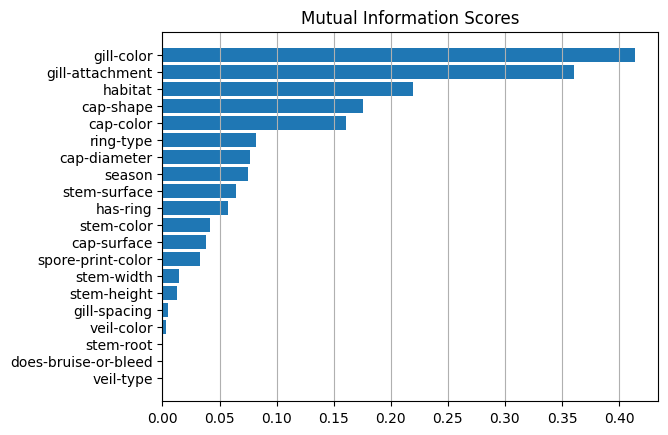

In [16]:
script.plot_mi_scores(mi_scores)
# script.plot_mi_scores(mi_scores.head(62))
# script.plot_mi_scores(mi_scores.tail(38))  # uncomment to see bottom 20

In [17]:
# # Lấy số lượng cột cần giữ lại (18 số cột có điểm MI cao nhất)
num_columns_to_keep = 17

# Lấy danh sách các cột cần giữ lại
columns_to_keep = mi_scores.nlargest(num_columns_to_keep).index

# Cập nhật X_train_encoded và X_test_encoded chỉ với các cột được giữ lại
features = features[columns_to_keep].drop(columns = features.select_dtypes(include='number').columns)

# Hiển thị các cột còn lại
print(f"Các cột được giữ lại:\n{columns_to_keep.tolist()}")

Các cột được giữ lại:
['gill-color', 'gill-attachment', 'habitat', 'cap-shape', 'cap-color', 'ring-type', 'cap-diameter', 'season', 'stem-surface', 'has-ring', 'stem-color', 'cap-surface', 'spore-print-color', 'stem-width', 'stem-height', 'gill-spacing', 'veil-color']


#### <span style="color:green">7.3. Feature Engineering</span>

In [18]:
features.dtypes

gill-color           object
gill-attachment      object
habitat              object
cap-shape            object
cap-color            object
ring-type            object
season               object
stem-surface         object
has-ring             object
stem-color           object
cap-surface          object
spore-print-color    object
gill-spacing         object
veil-color           object
dtype: object

In [19]:
categorical_feature = features.select_dtypes(exclude='number').columns
categorical_feature

Index(['gill-color', 'gill-attachment', 'habitat', 'cap-shape', 'cap-color',
       'ring-type', 'season', 'stem-surface', 'has-ring', 'stem-color',
       'cap-surface', 'spore-print-color', 'gill-spacing', 'veil-color'],
      dtype='object')

In [20]:
numerical_feature = features.select_dtypes(include='number').columns
numerical_feature

Index([], dtype='object')

##### <span style="color:tomato">Encode categorical feature</span>

In [21]:
categorical_feature

Index(['gill-color', 'gill-attachment', 'habitat', 'cap-shape', 'cap-color',
       'ring-type', 'season', 'stem-surface', 'has-ring', 'stem-color',
       'cap-surface', 'spore-print-color', 'gill-spacing', 'veil-color'],
      dtype='object')

In [22]:
features[categorical_feature]

,gill-color,gill-attachment,habitat,cap-shape,cap-color,ring-type,season,stem-surface,has-ring,stem-color,cap-surface,spore-print-color,gill-spacing,veil-color
id,,,,,,,,,,,,,,
54,o,a,d,f,n,f,u,s,f,w,t,k,c,w
188,n,a,g,x,n,e,u,y,t,w,t,k,c,w
287,r,d,d,x,r,f,u,s,f,w,t,k,c,w
484,u,a,m,x,r,e,u,y,t,w,t,u,c,w
644,y,a,g,x,y,f,a,s,f,o,s,k,c,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116054,y,a,g,x,y,f,u,s,f,o,s,k,c,w
3116595,u,a,g,x,r,e,u,y,t,w,t,u,c,w
3116738,o,d,d,x,n,f,a,s,f,o,t,k,c,w


In [23]:
categories = [match_type[col] for col in categorical_feature]
# encoder = OrdinalEncoder(
#     categories = categories,
#     handle_unknown = 'use_encoded_value', 
#     unknown_value  = 21321 # Do MNB yeu cau dau vao khong duoc la so am
# )
encoder = OneHotEncoder(
    categories = categories,
    sparse_output  = False,
    handle_unknown = "ignore"
)

features_encoded  = deepcopy(features)

# Encode
features_cat_encoded  = encoder.fit_transform(features[categorical_feature])

# Kiểm tra số cột
print("Số cột của dữ liệu đã mã hóa: ", features_cat_encoded.shape[1])

# Loại bỏ các cột trong `categorical` khỏi features_encoded
features_encoded  = features_encoded.drop(columns=categorical_feature)

# Thêm các cột đã mã hóa vào features_encoded
encoded_columns = encoder.get_feature_names_out(categorical_feature)

# Tạo DataFrame từ các cột đã mã hóa và gán lại tên cột
features_encoded  = pd.DataFrame(features_cat_encoded, columns=encoded_columns, index=features.index)

# Kết hợp lại với các cột còn lại trong features_encoded
features_encoded  = pd.concat([features_encoded, features.drop(columns=categorical_feature)], axis=1)

Số cột của dữ liệu đã mã hóa:  86


In [24]:
features_encoded

,gill-color_k,gill-color_n,gill-color_b,gill-color_h,gill-color_g,gill-color_r,gill-color_o,gill-color_p,gill-color_u,gill-color_e,...,spore-print-color_u,spore-print-color_w,spore-print-color_y,gill-spacing_c,gill-spacing_w,gill-spacing_d,veil-color_n,veil-color_o,veil-color_w,veil-color_y
id,,,,,,,,,,,,,,,,,,,,,
54,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
188,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
287,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3116595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3116738,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### <span style="color:green">7.4. Feature Scaling</span>

In [25]:
# features_encoded[numerical_feature]

In [26]:
# sns.histplot(
#     data = features_encoded[numerical_feature],
#     kde = True,
# )

In [27]:
# # Scale
# scaler = MinMaxScaler()

# features_scale = scaler.fit_transform(features_encoded[numerical_feature])

# features_encoded[numerical_feature] = features_scale

In [28]:
# features_encoded[numerical_feature]

In [29]:
# sns.histplot(
#     data = features_encoded[numerical_feature],
#     kde = True,
# )

#### <span style="color:green">7.5. Save data</span>

In [30]:
# Reset index thành cột 'id'
features_encoded = features_encoded.reset_index().rename(columns={'index': 'id'})

# Chuyển target thành DataFrame
targets_df = pd.DataFrame(targets_encoded, columns=['class'])

# Ghép ngang
merged_df = pd.concat([features_encoded, targets_df], axis=1)

# Xuất CSV
merged_df.to_csv('MNB_encoded.csv', index=False)

### <span style="color:orange">8.Model</span>

In [31]:
features_encoded = pd.read_csv("MNB_encoded.csv", index_col = "id")
targets_encoded  = features_encoded["class"]
features_encoded = features_encoded.drop(columns = ["class"])

In [32]:
features_encoded

,gill-color_k,gill-color_n,gill-color_b,gill-color_h,gill-color_g,gill-color_r,gill-color_o,gill-color_p,gill-color_u,gill-color_e,...,spore-print-color_u,spore-print-color_w,spore-print-color_y,gill-spacing_c,gill-spacing_w,gill-spacing_d,veil-color_n,veil-color_o,veil-color_w,veil-color_y
id,,,,,,,,,,,,,,,,,,,,,
54,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
188,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
287,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3116595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3116738,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
targets_encoded

id
54         0
188        1
287        0
484        1
644        1
          ..
3116054    1
3116595    1
3116738    0
3116885    0
3116888    0
Name: class, Length: 25527, dtype: int64

#### <span style="color:green">8.1. Building models</span>

##### <span style="color:tomato">Building Models ~ aproach1</span>

In [34]:
# best_nb_model = MultinomialNB()

##### <span style="color:tomato">Building Models ~ aproach2</span>

Validation Curve

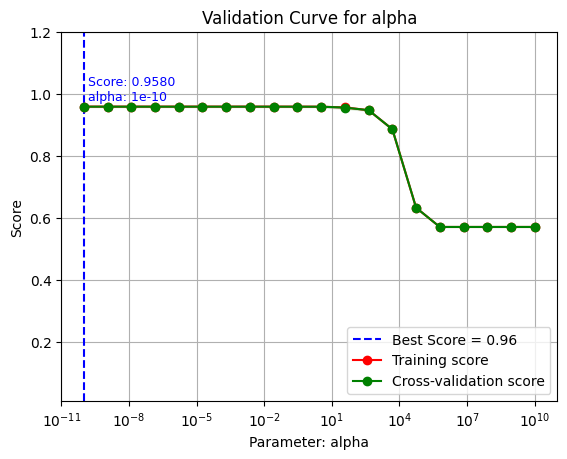

Validation Curve for alpha:
  → Best alpha = 1e-10
  → Best CV Score     = 0.9580



In [35]:
param_grid = {
    "alpha": np.logspace(-10, 10, 20),         # Multinomial, Bernoulli
    # "var_smoothing": np.logspace(-10, 0, 10) # Gaussian
}

script.plot_VC(
    X_data     = features_encoded,
    Y_data     = targets_encoded,
    model      = MultinomialNB(),
    param_grid = param_grid,
    ylim       = [0.01,1.20],
    n_jobs     = 4 # Quan trong: value o day quyet dinh se su dung bao nhieu processor de chay ~> cang cao cang tot
) # 0.9580 ~ 1e-10 ~ np.logspace(-10, 10, 20)

In [36]:
best_nb_model = MultinomialNB(
    alpha = 1e-10
) 

In [37]:
# Lưu model
joblib.dump(best_nb_model, 'MNB_model.pkl')

['MNB_model.pkl']

##### <span style="color:tomato">Building Models ~ aproach3</span>

In [38]:
# param_grid = {
#     # "alpha": np.logspace(-3, 1, 20),         # Multinomial, Bernoulli
#     "var_smoothing": np.logspace(-9, -5, 10) # Gaussian
# }

# best_nb_model = script.FindBestTuningModel(
#     model      = MultinomialNB(),
#     param_grid = param_grid,
#     train_X    = features_encoded,
#     train_y    = targets_encoded
# )

#### <span style="color:green">8.2. Training models</span>

##### <span style="color:tomato">Training Models ~ aproach1</span>

In [39]:
# X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(features_encoded, targets_encoded, test_size = 0.2, random_state=40024090)
# best_nb_model.fit(X_train_encoded, y_train_encoded)
# y_pred = best_nb_model.predict(X_test_encoded)

##### <span style="color:tomato">Training Models ~ aproach2</span>

Learning Curve

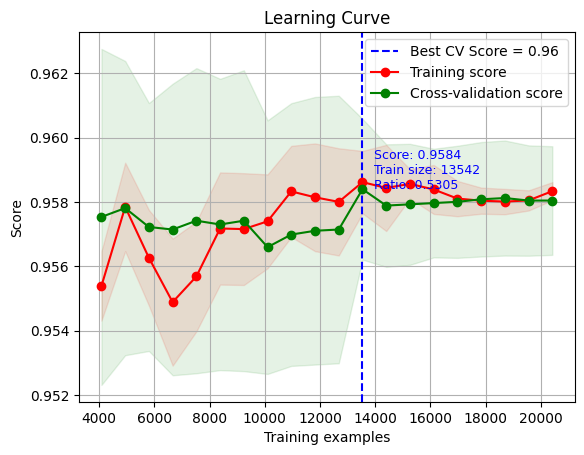

Learning Curve Results:
  → Best train size   = 13542 samples
  → Ratio             = 0.5305
  → Best CV Score     = 0.9584



In [40]:
script.plot_LC(
    X_data       = features_encoded,
    Y_data       = targets_encoded,
    model        = best_nb_model,
    train_sizes  = np.linspace(0.2, 1, 20),
    random_state = 40020409,
    n_jobs       = 4 # Quan trong: value o day quyet dinh se su dung bao nhieu processor de chay ~> cang cao cang tot
) # 0.9584 ~ 0.5305 ~ np.linspace(0.2, 1, 20)

In [41]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(
    features_encoded, targets_encoded, 
    train_size   = 0.5305,
    random_state = 40020409
)
best_nb_model.fit(X_train_encoded, y_train_encoded)
y_pred = best_nb_model.predict(X_test_encoded)

#### <span style="color:green">8.3. Save models</span>

In [42]:
# Lưu model
joblib.dump(best_nb_model, 'MNB_model_trained.pkl')

['MNB_model_trained.pkl']

### <span style="color:orange">9.Model Evaluation</span>

#### <span style="color:green">9.1. Load model</span>

In [43]:
# Load lại model
best_nb_model = joblib.load('MNB_model_trained.pkl')

#### <span style="color:green">9.2. Evaluation Metrics</span>

In [44]:
matthews_corrcoef(y_test_encoded, y_pred)

np.float64(0.92303472944809)

In [45]:
acs   = accuracy_score(y_test_encoded, y_pred)

print(f"Accuracy Score : {acs:.4f}")

Accuracy Score : 0.9622


Compare the train-set and test-set accuracy

In [46]:
y_pred_train = best_nb_model.predict(X_train_encoded)
y_pred_train

array([0, 1, 0, ..., 0, 0, 1], shape=(13542,))

In [47]:
acs   = accuracy_score(y_train_encoded, y_pred_train)
print(f"R² Score : {acs:.4f}")

R² Score : 0.9584


Check for overfitting and underfitting

In [48]:
print('Training set score : {:.4f}'.format(best_nb_model.score(X_train_encoded, y_train_encoded)))
print('Test set score     : {:.4f}'.format(best_nb_model.score(X_test_encoded, y_test_encoded)))

Training set score : 0.9584
Test set score     : 0.9622


#### <span style="color:green">9.3. Visualizing Evaluation results</span>

##### <span style="color:tomato">ROC Curve</span>

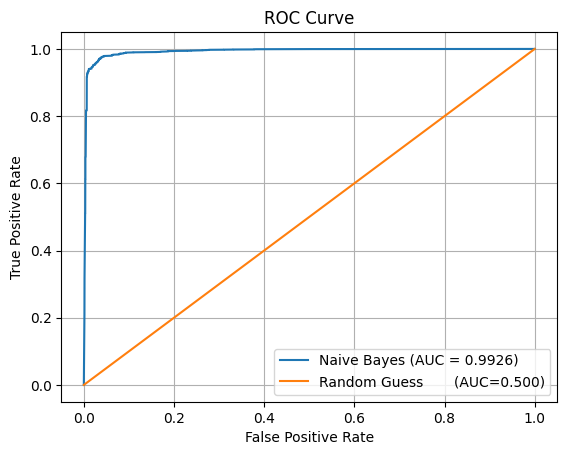

In [49]:
y_pred1 = best_nb_model.predict_proba(X_test_encoded)[:, 1]
nb_auc = roc_auc_score(y_test_encoded, y_pred1)
nb_fpr, nb_tpr, _ = roc_curve(y_test_encoded, y_pred1)


# plt.figure(figsize=(12, 8))
plt.plot(nb_fpr, nb_tpr,   label='Naive Bayes (AUC = %0.4f)' % nb_auc)
plt.plot([0, 1], [0, 1],   label='Random Guess       (AUC=0.500)')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()  
plt.show()

##### <span style="color:tomato">Confusion matrix</span>

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [50]:
script.plot_CF_aproach1(y_test_encoded, y_pred)

Confusion matrix

 [[4810  330]
 [ 123 6722]]

True Positives(TP) =  4810

True Negatives(TN) =  6722

False Positives(FP) =  330

False Negatives(FN) =  123


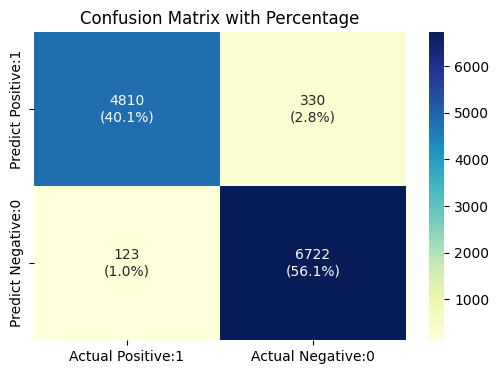

In [51]:
script.plot_CF_aproach2(y_test_encoded, y_pred)

##### <span style="color:tomato">Classification metrices</span>

Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

In [52]:
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5140
           1       0.95      0.98      0.97      6845

    accuracy                           0.96     11985
   macro avg       0.96      0.96      0.96     11985
weighted avg       0.96      0.96      0.96     11985



##### <span style="color:tomato">Class probabilities</span>

Text(0, 0.5, 'Frequency')

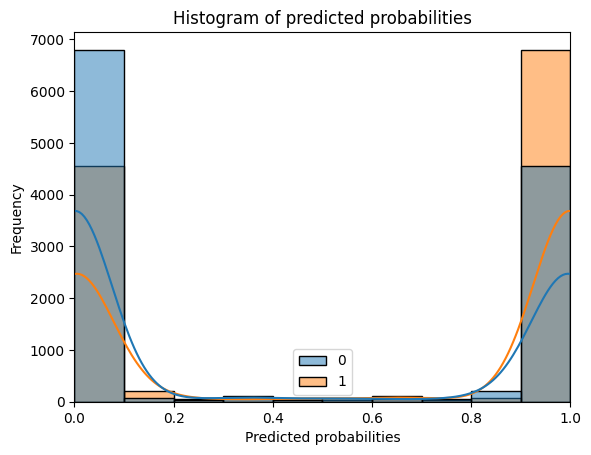

In [53]:
y_pred1 = best_nb_model.predict_proba(X_test_encoded)[:, :]
sns.histplot(
    data = y_pred1,
    bins = 10,
    kde  = True
)

plt.title('Histogram of predicted probabilities')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities')
plt.ylabel('Frequency')

#### <span style="color:green">9.4. Interpretation of performance</span>

In [ ]:
# # Logistic Regression
# lr_param_grid = {
#     'C': np.logspace(-4, 4, 10),    # regularization strength
#     'solver': ['lbfgs', 'liblinear']
# }
# best_lr_model = script.FindBestModel(
#     LogisticRegression(max_iter=1000),
#     lr_param_grid,
#     X_train_encoded, y_train_encoded
# )

# # Decision Tree
# dt_param_grid = {
#     'max_depth': [3, 5, 7, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'criterion': ['gini', 'entropy']
# }
# best_dt_model = script.FindBestModel(
#     DecisionTreeClassifier(random_state=42),
#     dt_param_grid,
#     X_train_encoded, y_train_encoded
# )

# # Random Forest
# rf_param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_features': ['sqrt', 'log2', 5],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }
# best_rf_model = script.FindBestModel(
#     RandomForestClassifier(random_state=42),
#     rf_param_grid,
#     X_train_encoded, y_train_encoded
# )

# KNN
# knn_param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan', 'minkowski']
# }
# best_knn_model = script.FindBestTuningModel(
#     KNeighborsClassifier(),
#     knn_param_grid,
#     X_train_encoded, y_train_encoded
# )

# # SVM
# svm_param_grid = {
#     'C': np.logspace(-3, 3, 7),
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }
# best_svm_model = script.FindBestModel(
#     SVC(probability=True, random_state=42),
#     svm_param_grid,
#     X_train_encoded, y_train_encoded
# )

# # XGBoost
# xgb_param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }
# best_xgb_model = script.FindBestModel(
#     XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
#     xgb_param_grid,
#     X_train_encoded, y_train_encoded
# )




# Logistic Regression
best_lr_model = LogisticRegression(C=1.0, solver='lbfgs', max_iter=1000)
best_lr_model.fit(X_train_encoded, y_train_encoded)

# Decision Tree
best_dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=2, criterion='gini', random_state=42)
best_dt_model.fit(X_train_encoded, y_train_encoded)

# Random Forest
best_rf_model = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=5, min_samples_split=2, random_state=42)
best_rf_model.fit(X_train_encoded, y_train_encoded)

# KNN
best_knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
best_knn_model.fit(X_train_encoded, y_train_encoded)

# SVM
best_svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42)
best_svm_model.fit(X_train_encoded, y_train_encoded)

# XGBoost
best_xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb_model.fit(X_train_encoded, y_train_encoded)

In [ ]:
print('Logistic Regression : Training set score = {:.4f}'.format(best_lr_model.score(X_train_encoded, y_train_encoded)))
print('                      Test set score     = {:.4f}'.format(best_lr_model.score(X_test_encoded, y_test_encoded)))

print('Decision Tree        : Training set score = {:.4f}'.format(best_dt_model.score(X_train_encoded, y_train_encoded)))
print('                      Test set score     = {:.4f}'.format(best_dt_model.score(X_test_encoded, y_test_encoded)))

print('Random Forest        : Training set score = {:.4f}'.format(best_rf_model.score(X_train_encoded, y_train_encoded)))
print('                      Test set score     = {:.4f}'.format(best_rf_model.score(X_test_encoded, y_test_encoded)))

print('K-Nearest Neighbors  : Training set score = {:.4f}'.format(best_knn_model.score(X_train_encoded, y_train_encoded)))
print('                      Test set score     = {:.4f}'.format(best_knn_model.score(X_test_encoded, y_test_encoded)))

print('Support Vector Machine : Training set score = {:.4f}'.format(best_svm_model.score(X_train_encoded, y_train_encoded)))
print('                        Test set score     = {:.4f}'.format(best_svm_model.score(X_test_encoded, y_test_encoded)))

print('XGBoost               : Training set score = {:.4f}'.format(best_xgb_model.score(X_train_encoded, y_train_encoded)))
print('                        Test set score     = {:.4f}'.format(best_xgb_model.score(X_test_encoded, y_test_encoded)))

In [ ]:
lr_probs  = best_lr_model.predict_proba(X_test_encoded)[:, 1]
dt_probs  = best_dt_model.predict_proba(X_test_encoded)[:, 1]
rf_probs  = best_rf_model.predict_proba(X_test_encoded)[:, 1]
knn_probs = best_knn_model.predict_proba(X_test_encoded)[:, 1]
svm_probs = best_svm_model.predict_proba(X_test_encoded)[:, 1]
xgb_probs = best_xgb_model.predict_proba(X_test_encoded)[:, 1]

y_pred1 = best_nb_model.predict_proba(X_test_encoded)[:, 1]

nb_auc = roc_auc_score(y_test_encoded, y_pred1)
lr_auc = roc_auc_score(y_test_encoded, lr_probs)
dt_auc  = roc_auc_score(y_test_encoded, dt_probs)
rf_auc = roc_auc_score(y_test_encoded, rf_probs)
knn_auc = roc_auc_score(y_test_encoded, knn_probs)
svm_auc = roc_auc_score(y_test_encoded, svm_probs)
xgb_auc = roc_auc_score(y_test_encoded, xgb_probs)
print(f'Naive Bayes         : AUROC = {nb_auc:.3f}')
print(f'Logistic Regression : AUROC = {lr_auc:.3f}')
print(f'Decision Tree       : AUROC = {dt_auc:.3f}')
print(f'Random Forest       : AUROC = {rf_auc:.3f}')
print(f'K-Nearest Neighbors : AUROC = {knn_auc:.3f}')
print(f'SVM                 : AUROC = {svm_auc:.3f}')
print(f'XGBoost             : AUROC = {xgb_auc:.3f}')

In [ ]:
nb_fpr, nb_tpr, _ = roc_curve(y_test_encoded, y_pred1)
lr_fpr, lr_tpr, _ = roc_curve(y_test_encoded, lr_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test_encoded, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test_encoded, rf_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test_encoded, knn_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test_encoded, svm_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_encoded, xgb_probs)


plt.figure(figsize=(12, 8))
plt.plot(nb_fpr, nb_tpr,   label='Naive Bayes        (AUC = %0.4f)' % nb_auc)
plt.plot(lr_fpr, lr_tpr,   label='LogisticRegression (AUC = %0.4f)' % lr_auc)
plt.plot(fpr_dt, tpr_dt,   label=f'Decision Tree     (AUC={dt_auc:.4f})')
plt.plot(rf_fpr, rf_tpr,   label=f'Random Forest     (AUC = %0.4f)' % rf_auc)
plt.plot(fpr_knn, tpr_knn, label=f'KNN               (AUC={knn_auc:.4f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM               (AUC={svm_auc:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost           (AUC={xgb_auc:.4f})')
plt.plot([0, 1], [0, 1],   label='Random Guess       (AUC=0.500)')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()  
plt.show()

### <span style="color:orange">10. Conclusion</span>

In [ ]:
# Deepcopy test_df cho tập validation
X_val_encoded = deepcopy(test_df)

# Encode tập validation
X_val_cat_encoded = encoder.transform(X_val_encoded[categorical_feature])

# Tạo DataFrame mới từ cột mã hóa
encoded_columns = encoder.get_feature_names_out(categorical_feature)
X_val_cat_encoded_df = pd.DataFrame(X_val_cat_encoded, columns=encoded_columns, index=X_val_encoded.index)

# Loại bỏ cột categorical khỏi X_val_encoded
X_val_encoded = X_val_encoded.drop(columns=categorical_feature)

# Nối lại cột encode vào
X_val_encoded = pd.concat([X_val_encoded, X_val_cat_encoded_df], axis=1)

In [ ]:
X_val_encoded.info()

In [ ]:
# Ensure X_val_encoded contains only the columns used during training
X_val_encoded = X_val_encoded[columns_to_keep].drop(columns = features.select_dtypes(include='number').columns)

# Predict the target variable
y_val_predict = best_nb_model.predict(X_val_encoded)

In [ ]:
y_pred2 = best_nb_model.predict_proba(X_val_encoded)[:, :]
sns.histplot(
    data = y_pred2,
    bins = 10,
    kde  = True
)

plt.title('Histogram of predicted probabilities')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities')
plt.ylabel('Frequency')